# SWAHILI AUDIO PREDICTION: AN AUTOMATIC SPEECH RECOGNITION (ASR) PREDICTIVE MODELING PROJECT

* [1. BUSINESS UNDERSTANDING](#1-business-understanding)

    * [1.1 Introduction](#1.1-introduction)

    * [1.2 Problem Statement](#1.2-problem-statement)

    * [1.3 Main Objective](#1.3main-objective)

    * [1.4 Specific Objectives](#1.3Specific-objectives)

    * [1.5 Experimental Designing](#1.5-experimental-designing)

    * [1.6 Metric of Success](#1.6-metric-of-success)

    * [1.7 Data Understanding](#1.7-data-understanding)

* [2. IMPORTING LIBRARIES](#2-importing-libraries)

* [3. DATA COLLECTION](#3-data-collection)

* [4. DATA CLEANING](#4-data-cleaning)

* [5. EXPLORATORY DATA ANALYSIS](#5-exploratory-data-analysis)

* [6. FEATURE ENGINEERING](#6-feature-engineering)

    * [6.1 Spetrograms](#61-spectograms)

    * [6.2 MFCC](#62-mel-frequency-cepstral-coefficientsmfccs)

* [7. MODELLING](#7-modeling)

    * [7.1 Loading Data](#71-custom-data-loader-for-training-set)

    * [7.2 AlexNet Model](#72-alexnet-model)

    * [7.3 ResNet Model](#73-resnet-18-model)

        * [7.3.1 Training ResNet Model](#731-training-resnet18-model)

        * [7.3.2 Testing ResNet Model](#732-prediction-on-test-set)

* [8. CONCLUSION](#8-conclusions)

* [9. RECOMMENDATIONS](#9-recommendations)


## 1. BUSINESS UNDERSTANDING
### 1.1 Introduction
![image](for_notebook.jpeg)

Swahili, originating on the East African coast, acted as a significant lingua franca, influenced by interactions between Bantu communities and Arab traders. Thriving city-states like Kilwa and Zanzibar boosted its prominence. In Automatic Speech Recognition (ASR) projects, Swahili's unique phonetics and dialects are a compelling challenge. ASR aims to transcribe spoken Swahili into text, making it useful for transcription and translation. Successful ASR for Swahili requires tailored models that adapt to the language's nuances. This technology plays a vital role in preserving and promoting Swahili's linguistic and cultural heritage, fostering cross-cultural communication and expanding the language's utility.

### 1.2 Problem Statement
Swahili, also known as Kiswahili, has a rich history that spans centuries and is now one of the most widely spoken languages in Africa, with millions of speakers across various countries. Today, Swahili is not only a language of communication but also a symbol of cultural heritage and identity for millions of people in East Africa and beyond. Its history reflects the dynamic nature of language, shaped by trade, migration, colonization, and cultural exchange over the centuries.
With the increasing availability of digital audio content in Swahili, AnalytiX Insights aims to develop automated systems that can classify and categorize Swahili audio recordings for various applications, including speech recognition, content recommendation, and language learning tools.

### 1.3 Main Objective
- To develop an automated system for converting basic Swahili audio into written text using speech recognition technology.

### 1.4 Specific Objectives
1. To develop a machine learning model capable of translating Swahili audio recordings.
2. To deploy a model that transcribes the recorded audio files.
3. To provide recommendations for further enhancements and applications.


### 1.5 Experimental Designing

![alt text](Data/1_or3AExBSojIlqJarrtZKqA.webp)

* Data Collection
* Data Preprocessing
* Exploration Data Analysis
* Feature Extraction
* Modelling
* Evaluation
* Deployment
* Conclusion
* Recommendations

### 1.6 Metric of Success
#### 1.6.1 Accuracy:
* The ratio of correctly recognized words to the total number of words in the reference transcription. A high accuracy rate will indicate a successful ASR system, as it signifies the system's capability to understand and convert spoken language into text with a high level of correctness.

#### 1.6.2 Word Error Rate[WER]
* It quantifies the accuracy of the system by comparing the transcribed text to the reference text and measuring the number of insertions, deletions, and substitutions required to align them. A lower WER will indicate a higher level of success, as it represents a closer match between the system's output and the expected transcript.


### 1.7 Data Understanding
The data used in this project was collected by 300 contributors based in Kenya. It consists of recordings of twelve different phrases spoken in Swahili.Here are the 12 words and their English translations. You need to predict the Swahili word; the English is here for interest's sake.
| SWAHILI  | ENGLISH  |
| -------- |:--------:|
| Ndio     | Yes      |
| Hapana   | No       |
| Mbili    | Two      |
| Tatu     | Three      |
| Nne     | Four      |
| Tano     | Five      |
| Sita     | Six      |
| Saba     | Seven      |
| Nane     | Eight      |
| Tisa     | Nine      |
| Kumi     | Ten      |
| Moja     | One      |

## 2. IMPORTING LIBRARIES

In [38]:
# Basic data manipultation and analysis
import numpy as np
import pandas as pd

# Data visualization libraries
from scipy.ndimage import minimum_filter1d
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Audio preprocessing 
import os
import torch
import shutil
import random
import librosa
import librosa.display
import noisereduce as nr
import IPython.display as ipd
from tqdm.notebook import tqdm

from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader

# Machine learning models
import torchaudio
from torch import nn
from torchsummary import summary
from torchvision.models import resnet18, ResNet18_Weights

# model evaluation metrics
import sklearn.preprocessing
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score
from jiwer import wer

# Import custom functions and trained models.
import Functions
import pickle

# To ensure a more organized and tidy output.
import warnings
warnings.filterwarnings('ignore')

In [39]:
# Set seed
np.random.seed(2022)

## 3. DATA COLLECTION

In [40]:
# Load files
train = pd.read_csv('Data/Train.csv')
test = pd.read_csv('Data/Test.csv')

# Unzip audio zip file
shutil.unpack_archive('Data/Swahili_words.zip', 'Data/Swahili_words')

In [41]:
# Preview train set
train.head()

Word_id Swahili_word English_translation
0  id_v8rz06e6rv31.wav        mbili                 two
1  id_vmbwicdpfn68.wav         tatu               three
2  id_injlouhxg1hg.wav         ndio                 yes
3  id_gdq23p6xgzya.wav          nne                four
4  id_lpstklz51zpz.wav         nane               eight

The dataset has three columbs:
- **Word_id:** Has all the audio files.
- **Swahili_word:** The trasncription of the Audio file.
- **English Translation:** The respective translation of the Swahili word.

In [42]:
# Preview test set
display(test.head(), train.shape, test.shape)

Word_id
0  id_jp2pxl0r84ya.wav
1  id_ndduqqvthbpx.wav
2  id_36oxymxfcm6q.wav
3  id_ue9b0to760pg.wav
4  id_prja4oprb914.wav

(4200, 3)

(1800, 1)

In [43]:
# Target distribution
train.Swahili_word.value_counts()

Swahili_word
mbili     350
tatu      350
ndio      350
nne       350
nane      350
hapana    350
sita      350
tisa      350
moja      350
saba      350
tano      350
kumi      350
Name: count, dtype: int64

- We only have 12 Swahili words to work with which are equaly distributed across the dataset.
- We will sample random audio files from the dataset to determine whether the Swahili transcription are right according to the transcription.

In [44]:
# Sample some words
for word in random.sample(train.Swahili_word.unique().tolist(), 6):
  sample = train[train.Swahili_word == word].Word_id.sample(1).values[0]
  display(word, sample, ipd.Audio('Data/Swahili_words/'+ sample ))

'kumi'

'id_21l10o79qvdg.wav'

'sita'

'id_6ybpvd3cf47b.wav'

'hapana'

'id_kxsilzue946l.wav'

'nane'

'id_eaor27mf31c1.wav'

'saba'

'id_htc6xgkh7j3w.wav'

'tano'

'id_9d0xuj83rvhz.wav'

- The audio files are accurate, recorded using various voices in diverse conditions, including background noise, high and low pitches, and various acoustic environments. Data cleaning is essential to enhance model training and development.

## 4. DATA CLEANING

The following steps will be executed:
1. **Load Audio Files:** Load multiple audio files from a the Swahili audio folder, allowing ud to work with a collection of audio recordings.

2. **Visualize Audio Waveforms:** visualizes the waveform of each loaded audio file using Matplotlib, which helps in inspect the raw audio data.

3. **Resample Audio:** Resamples the audio to a specified target sampling rate if the native sampling rate of the audio files differs from the target rate. This is important since we need the audio data to be at a consistent sampling rate.

4. **Noise Reduction:** Use the `noisereduce` library, to replace it with  noise reduction techniques. Noise reduction is particularly useful when dealing with audio recordings that contain background noise.

5. **Normalization:** Normalizes the audio data to ensure that it falls within a common range, typically between -1 and 1. Normalization helps in making the audio data more suitable for analysis or modeling.

6. **Error Handling:** Handle exceptions that may occur during audio processing, ensuring that the script doesn't crash if there are issues with specific audio files.

Found 6000 files


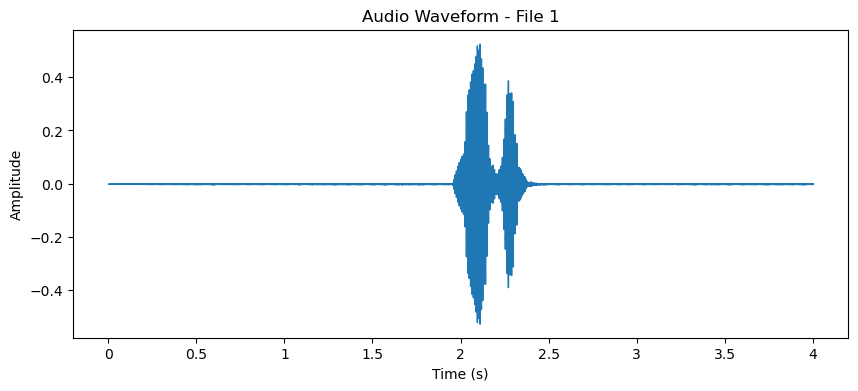

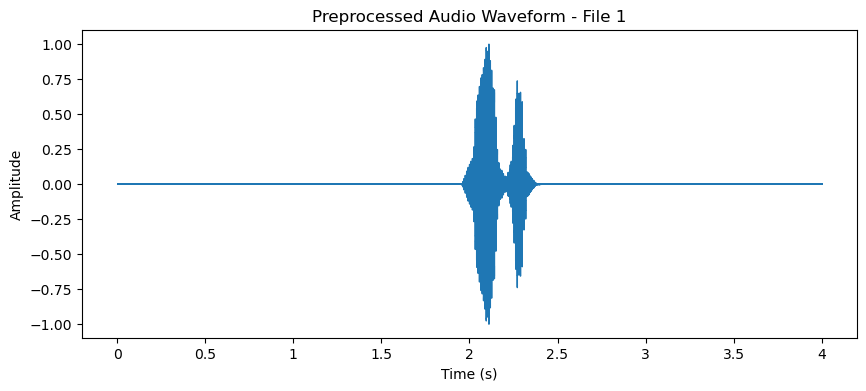

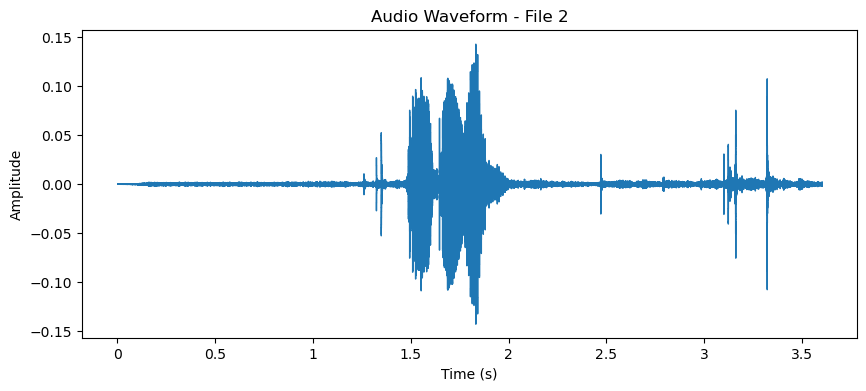

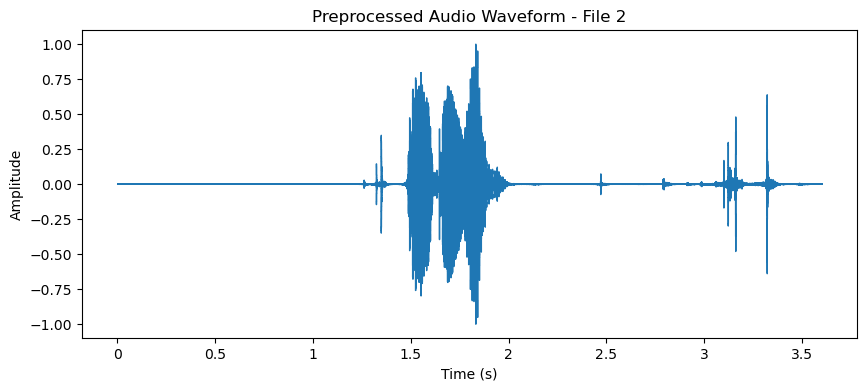

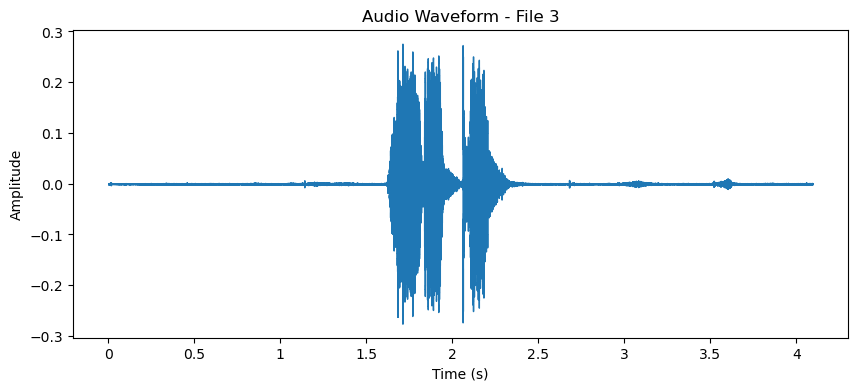

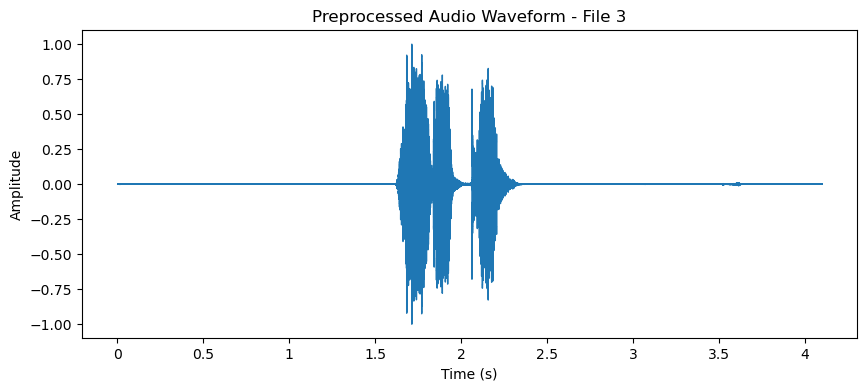

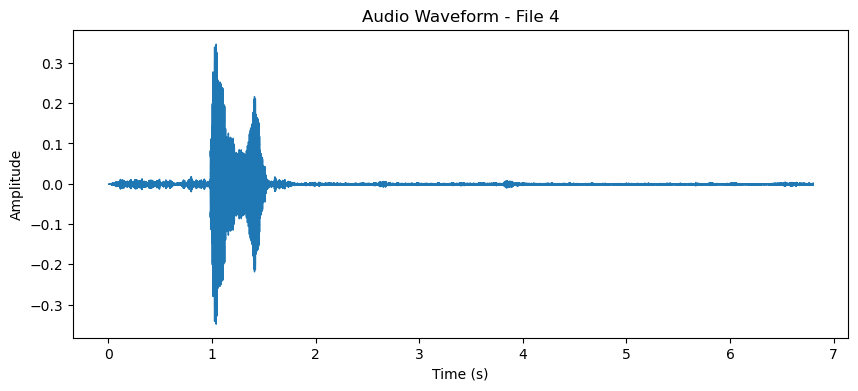

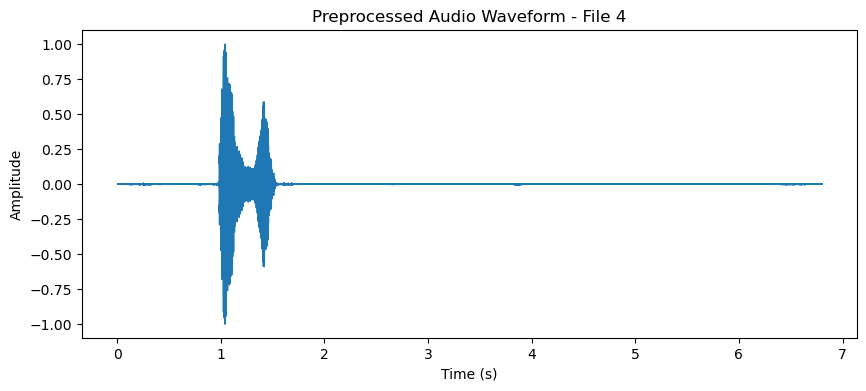

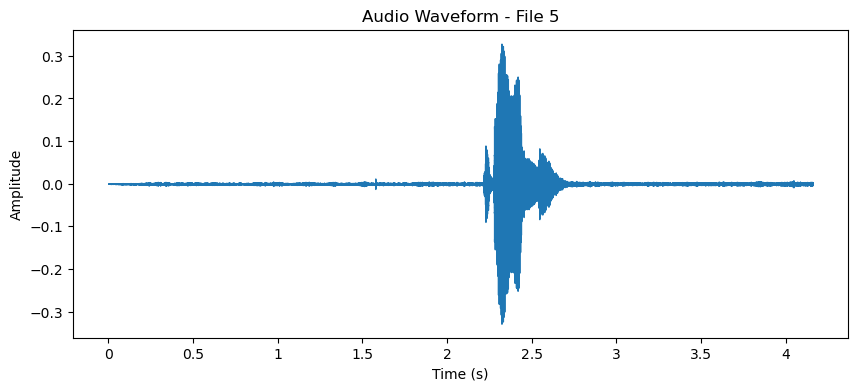

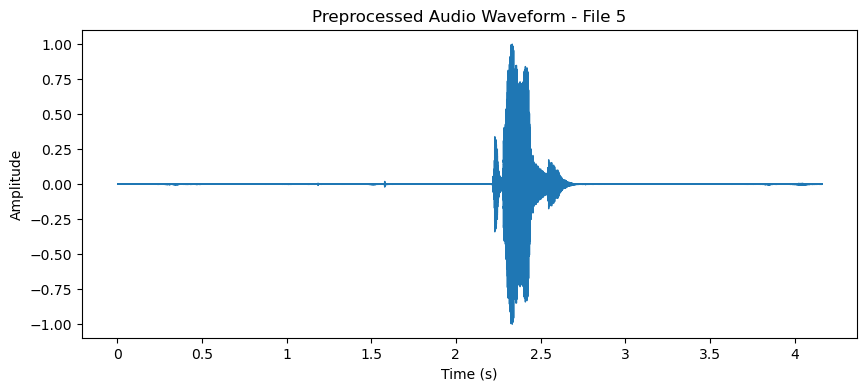

In [45]:
# Load the dummy audio files
data_folder = r'Data/Swahili_words'
audio_files = [os.path.join(data_folder, filename) for filename in os.listdir(data_folder)]  # get list of audio files
audio_files = [audio_file for audio_file in audio_files if audio_file.endswith('.wav')]  # filter out non-audio files
print(f'Found {len(audio_files)} files')  # print the number of files

# Limit the number of visualizations to 5
num_visualizations = 5
for i, audio_file in enumerate(audio_files[:num_visualizations]):
    try:
        y, sr = librosa.load(audio_file, sr=None)  # Load the audio file with its native sampling rate

        # Visualize the audio waveform
        plt.figure(figsize=(10, 4))
        librosa.display.waveshow(y, sr=sr)
        plt.title(f"Audio Waveform - File {i + 1}")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.show()

        # Preprocessing steps
        target_sr = 16000  # Target sampling rate to 16 kHz
        if sr != target_sr:
            y = librosa.resample(y, sr, target_sr)
            sr = target_sr

        # Apply noise reduction technique.
        y= nr.reduce_noise(y, sr=sr)

        # Normalize the audio to a common range (-1 and 1)
        y = librosa.util.normalize(y)

        # Plot the preprocessed audio waveform
        plt.figure(figsize=(10, 4))
        librosa.display.waveshow(y, sr=sr)
        plt.title(f"Preprocessed Audio Waveform - File {i + 1}")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.show()

    except Exception as e:
        print(f"Error processing file: {audio_file}")
        print(e)

- Our audio files have been cleaned, and the contrast between the original and cleaned files is noticeable. The cleaning process effectively removed noises, enhancing the overall quality.

## 5. EXPLORATORY DATA ANALYSIS
- We will visualize these audio samples by printing their waveforms and spectrograms, this will enable us to observe the acoustic characteristics. This will offer valuable insights into the variations in pronunciation, intonation, and background noise that our audio files have. The visualization of the audio files, we lay the foundation for fine-tuning our model.

In [46]:
# Create a dictionary to check the audio files with the same transcription 
# Get three sample
dict_samples=dict()
for word in train['Swahili_word'].unique().tolist():
    sample = train[train['Swahili_word'] == word]['Word_id'].sample(3).values[:]
    dict_samples[word] = sample

In [47]:
#Displaying the sample
dict_samples

{'mbili': array(['id_5rlc5o5n1s1b.wav', 'id_htx9vb45vk8h.wav',
        'id_cjhhxujadkd1.wav'], dtype=object),
 'tatu': array(['id_5aly5y4f0ihq.wav', 'id_gdhnpb9tk6ju.wav',
        'id_02yh4h2au53z.wav'], dtype=object),
 'ndio': array(['id_uy4dyk2y8itg.wav', 'id_1uh1rjrqhoxs.wav',
        'id_q8ublattuf6h.wav'], dtype=object),
 'nne': array(['id_nmwysb9aih92.wav', 'id_1pca3ef7fyf6.wav',
        'id_z4bsgktw3vgy.wav'], dtype=object),
 'nane': array(['id_31s05g5prv7n.wav', 'id_no8u2tvobi1m.wav',
        'id_6onfy14u6ztv.wav'], dtype=object),
 'hapana': array(['id_j4u9jxt3qows.wav', 'id_69xkivr12erg.wav',
        'id_2e06s8yxz1m4.wav'], dtype=object),
 'sita': array(['id_uegn3hwrd2eo.wav', 'id_0r7awrawc36d.wav',
        'id_t4xbvwqx3qdu.wav'], dtype=object),
 'tisa': array(['id_kbykqygrrlc1.wav', 'id_g7gt7q60x9fx.wav',
        'id_bo3voxkx4890.wav'], dtype=object),
 'moja': array(['id_syxtdgknf2me.wav', 'id_tsumlqgjrphf.wav',
        'id_m9784h87c2ce.wav'], dtype=object),
 'saba': array(['

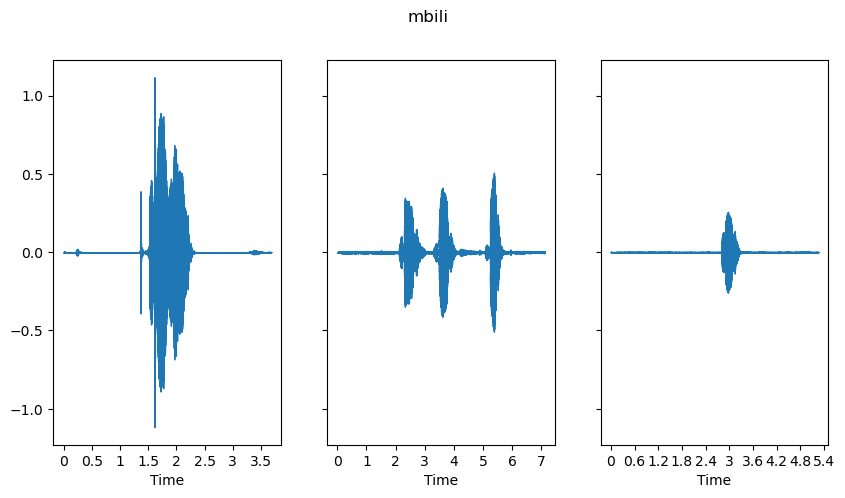

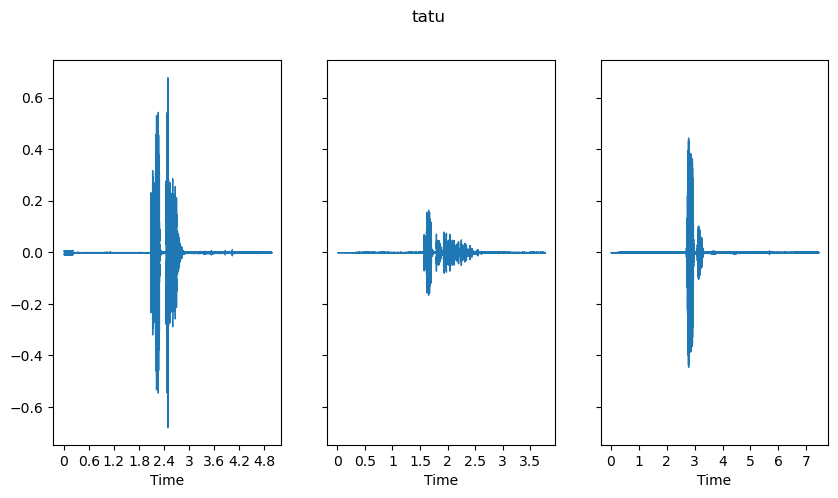

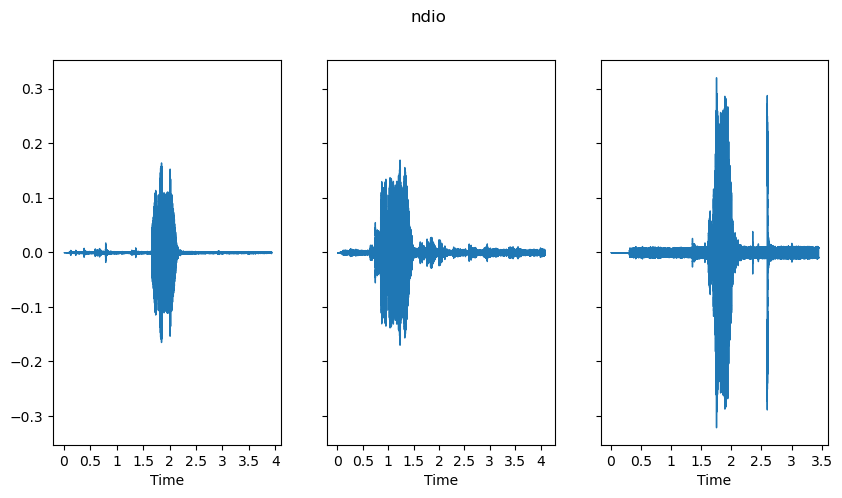

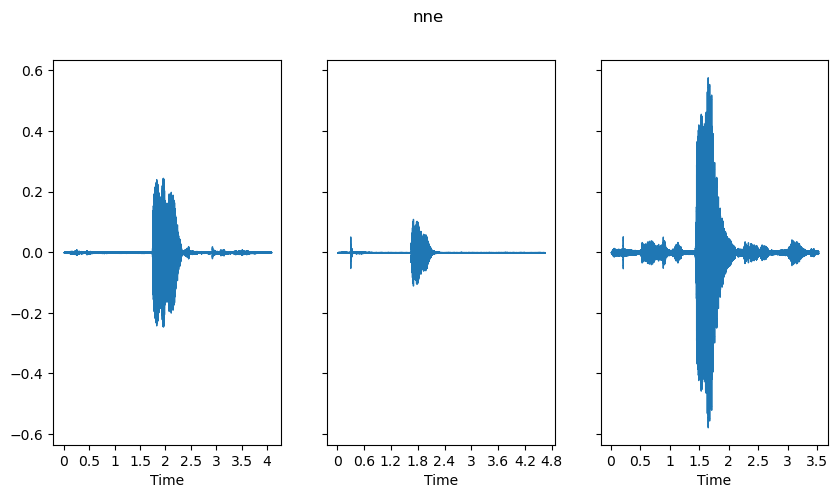

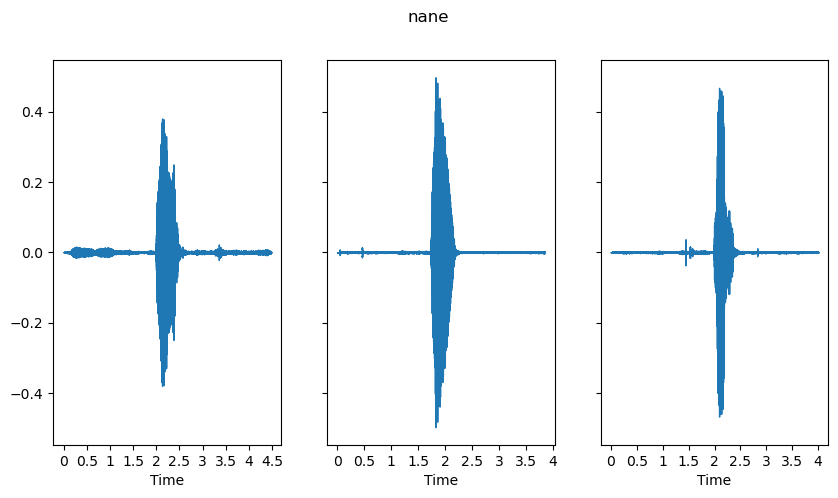

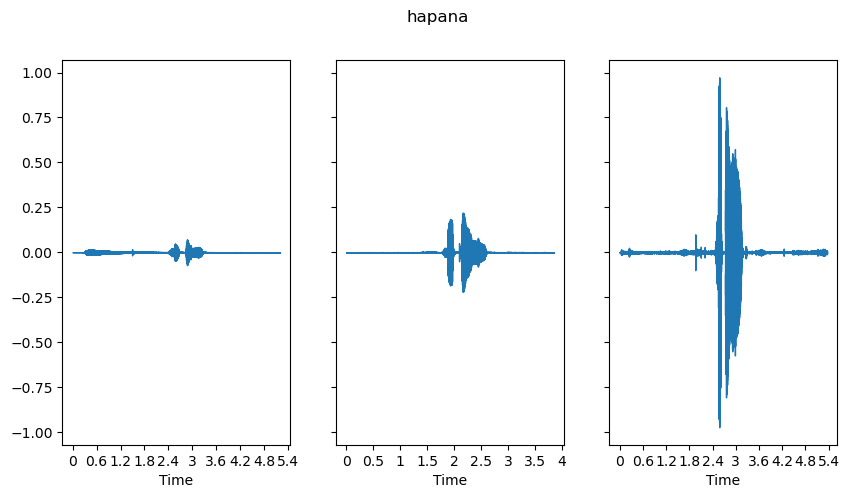

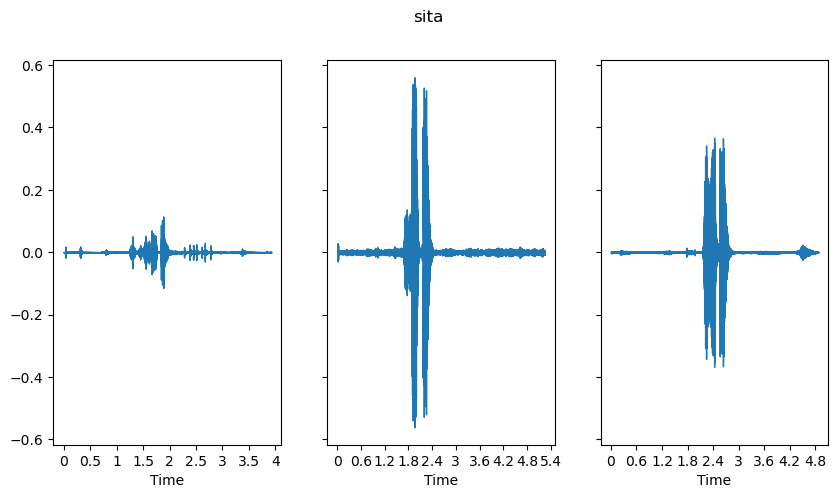

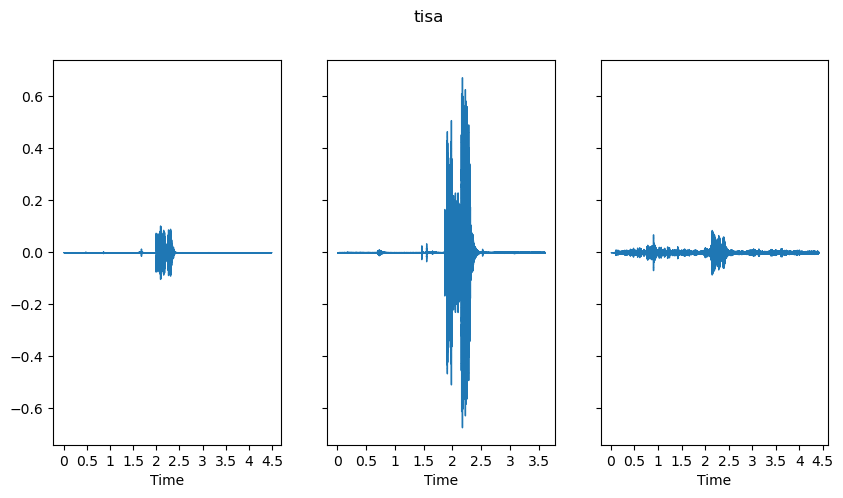

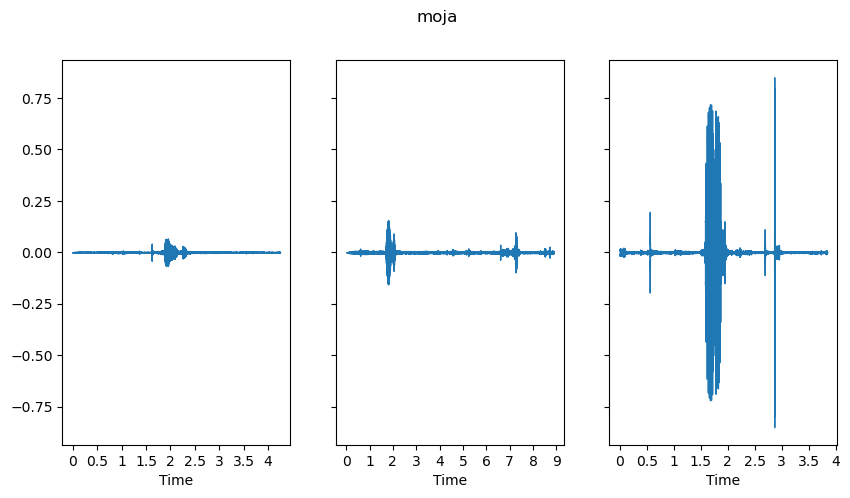

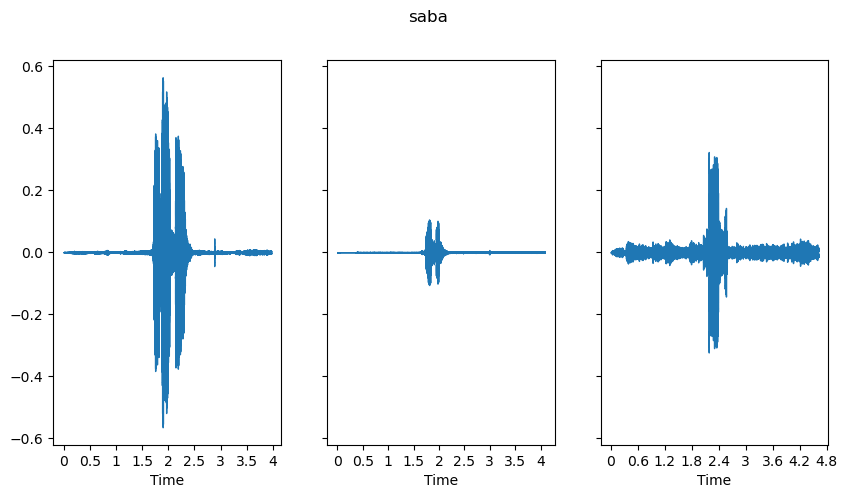

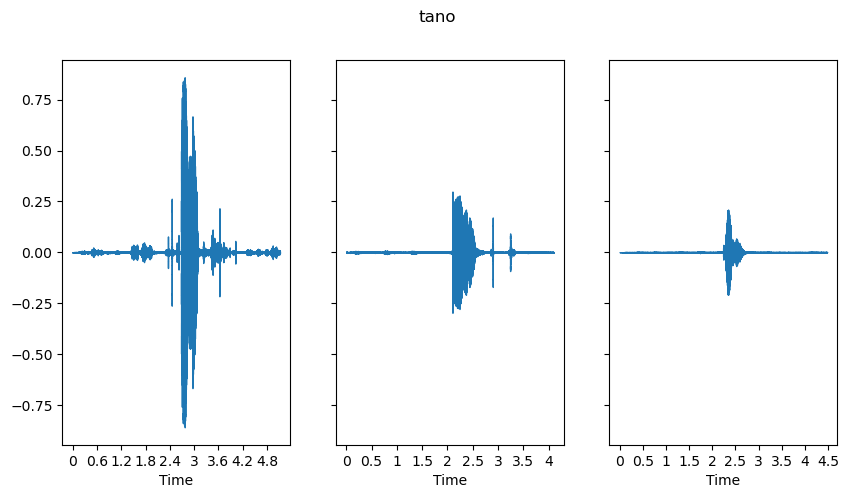

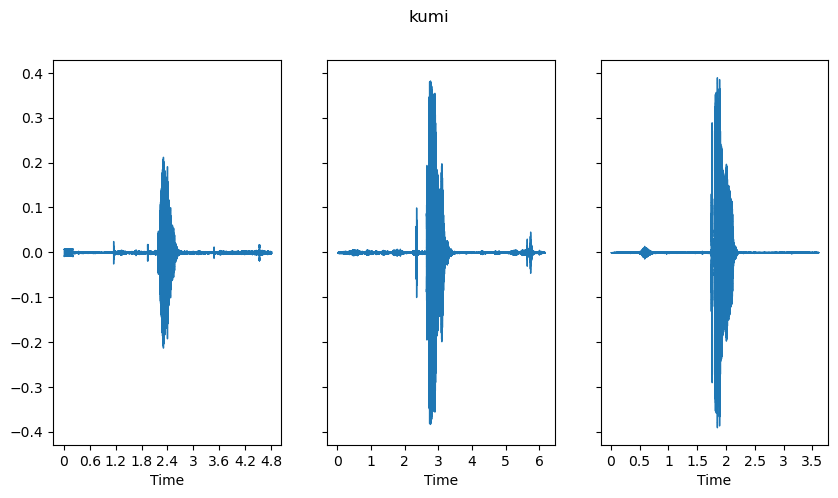

In [48]:
# show three wavefiles for all words in time domain, for easy comparison between the words
for word in dict_samples:
    i=0
    fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)
    fig.set_size_inches(10, 5)
    fig.suptitle(word)
    for audiofile in dict_samples[word]:
        x, sr = librosa.load('Data/Swahili_words/'+audiofile)
        img = librosa.display.waveshow(x, sr=sr, ax=ax[i])
        i+=1

**Observation**
- Each word has its own unique display of the wave-form. 
- Regardless of the same word haveing different amplitudes there is a consistency in the wave forms, where there is a higher amplitued it appears almost on all the wave forms of the same word.

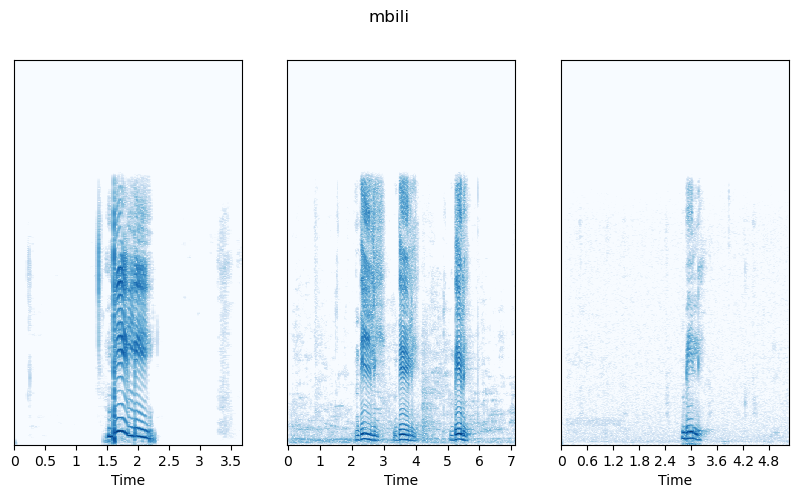

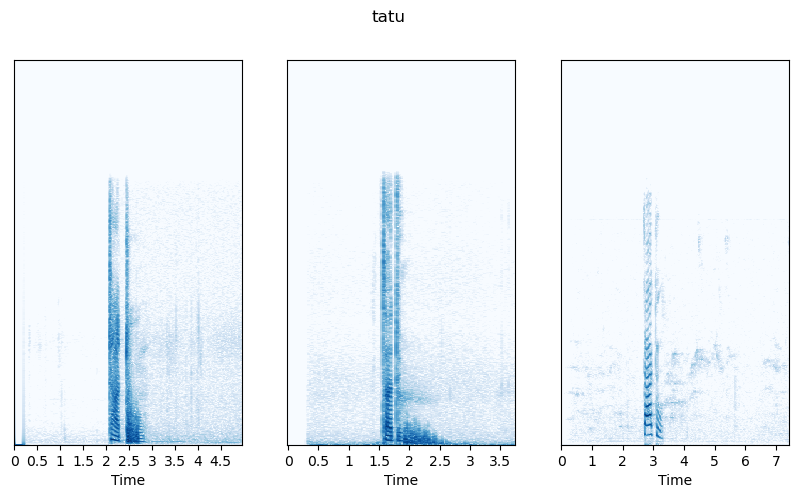

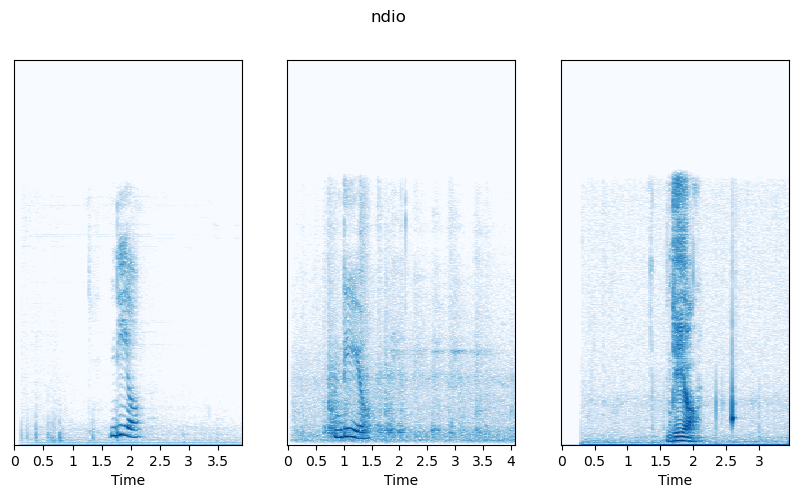

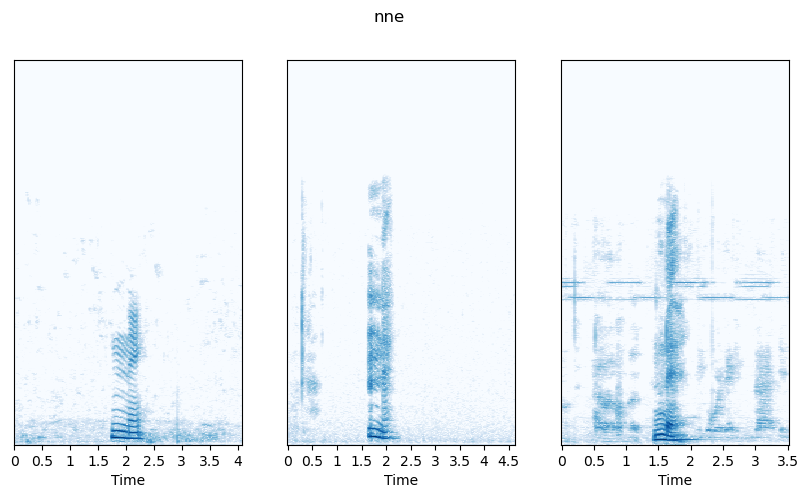

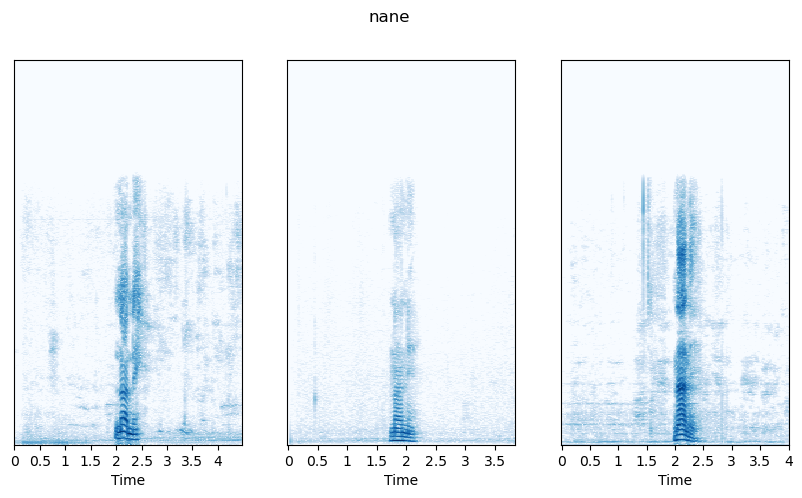

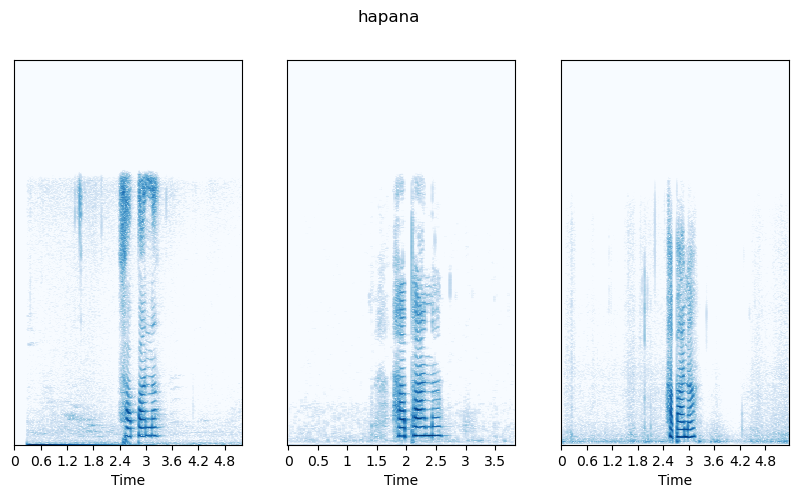

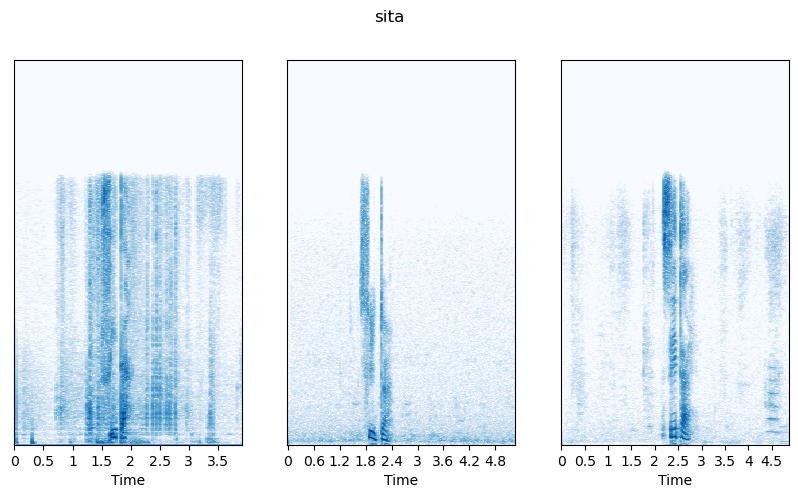

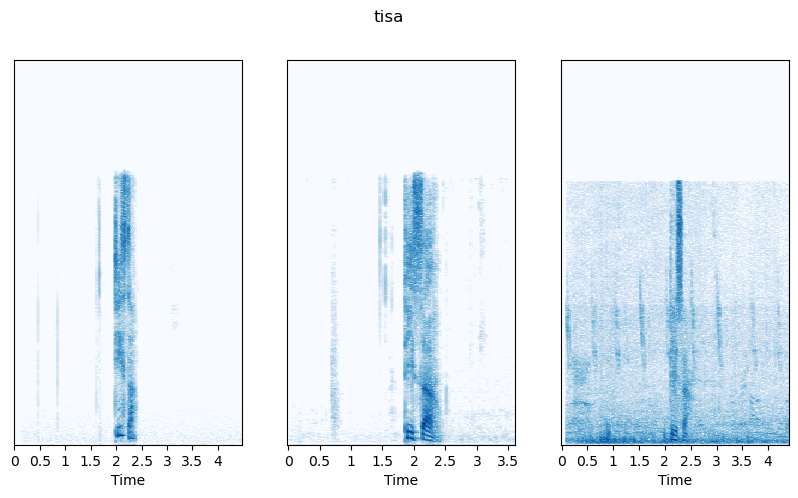

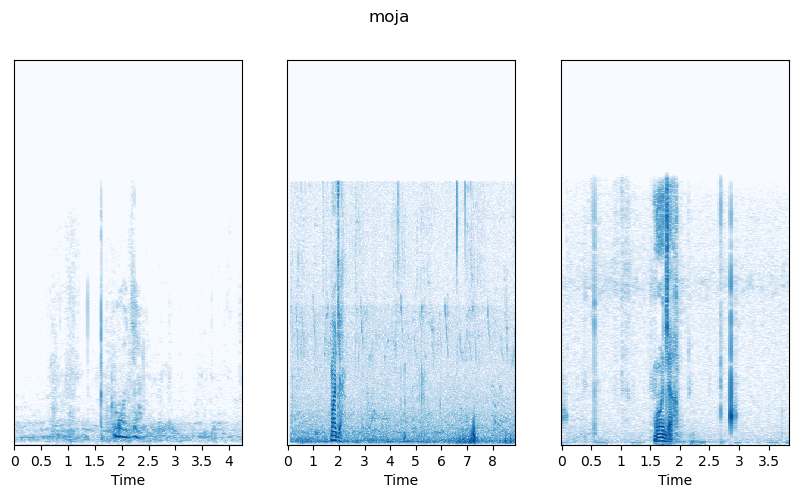

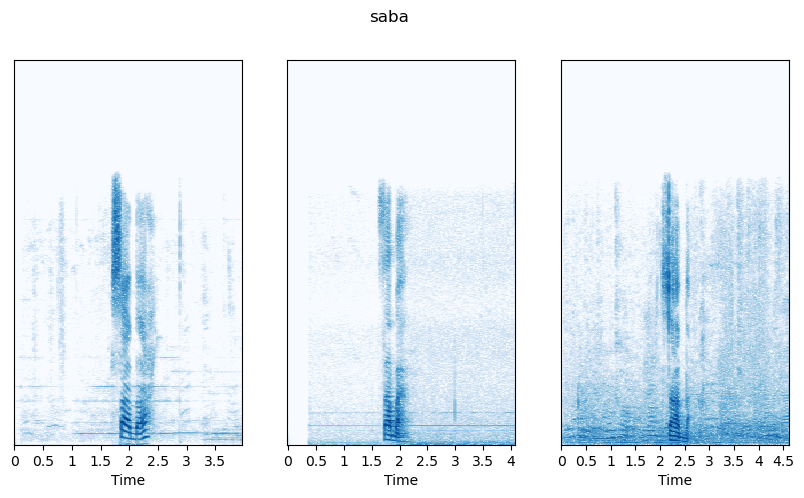

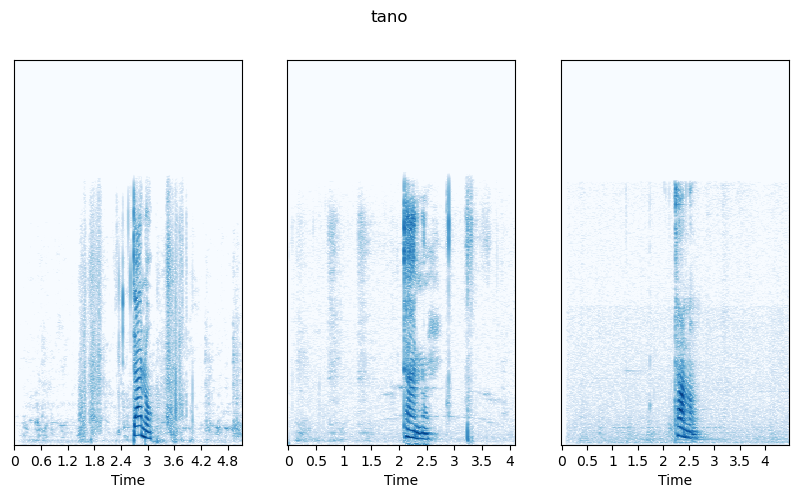

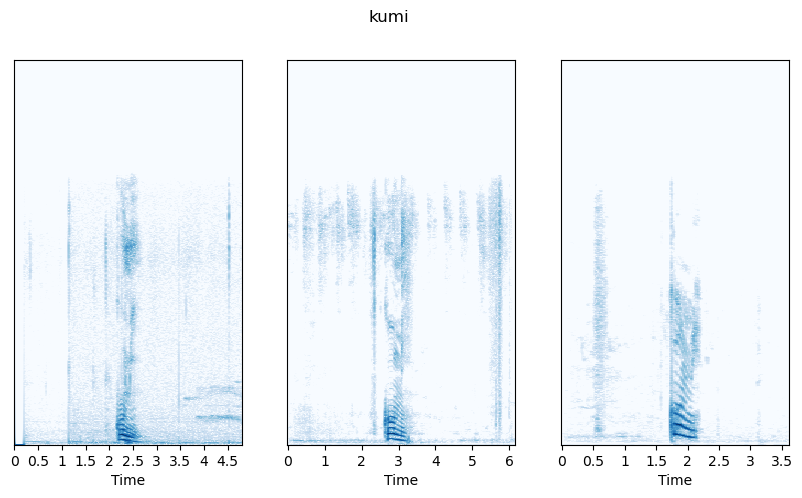

In [49]:
# Displaying the spectrograms of the same
for word in dict_samples:
    i = 0
    fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)
    fig.set_size_inches(10, 5)
    fig.suptitle(word)
    for audiofile in dict_samples[word]:
        x, sr = librosa.load('Data/Swahili_words/' + audiofile)
        X = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max)
        ax[i].set_facecolor('white') 
        img = librosa.display.specshow(X, x_axis='time', sr=sr, ax=ax[i], cmap='Blues') 
        i += 1

plt.show() 


## 6. FEATURE ENGINEERING
There are many ways to tackle this challenge. In this project we will use Spectograms and MFCCS(Mel-frequency cepstral coefficients).

#### 6.1. Spectograms
Spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform.  Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.

Will do deep learning on the audio, generate a spectrogram and treat this as an image classification task, use some signal processing tricks to look for close matches, try to extract meaningful features such as dominant frequencies.

Using spectrograms have their advantages which include;
- Allowing us to visually represent audio signals, making it easier to understand the underlying sound. They provide a graphical representation of how sound energy is distributed across different frequencies and how it evolves over time.
- Recognition of patterns in audio files and feature extraction. They reveal important features such as speech formants, musical notes, environmental sounds, and more.

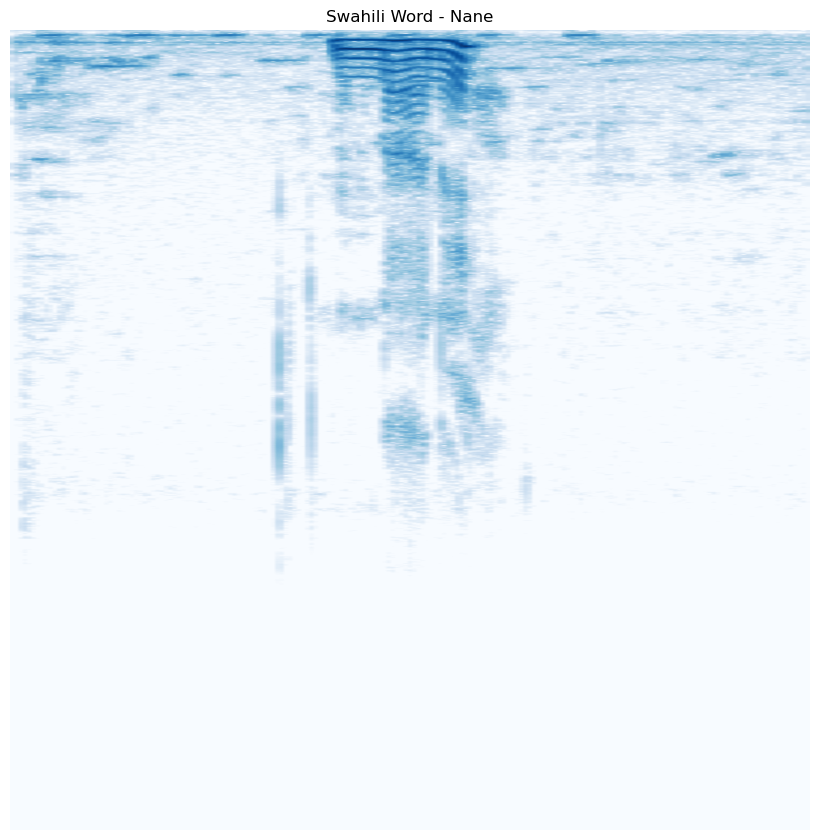

In [50]:
# Going from a sound to an image: spectrograms
os.mkdir('Data/spectrograms') # Create a folder to store the spectrograms

# Function to generate spectrogram
def gen_spectrogram(path):
    x, sr = librosa.load(path)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X)[:,:min(1025, len(X[0]))])

    fig = plt.figure(frameon=False)
    fig.set_size_inches(8, 8)
    
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    ax.set_facecolor('white')
    
    fig.add_axes(ax)

    plt.title('Swahili Word - Nane')

    ax.imshow(Xdb, aspect='auto', cmap='Blues')  # Set the colormap to 'Blues'

    spec_path = 'Data/spectrograms/' + path.split('/')[1][:-4] + '.png'
    fig.savefig(spec_path, dpi=512//8)

gen_spectrogram('Data/Swahili_words/id_pwvzavl2dl6q.wav')
display(ipd.Audio('Data/Swahili_words/id_pwvzavl2dl6q.wav'))

In [ ]:
# Concatenate train with test for easy data manipulation
train_test_files = train.Word_id.tolist() + test.Word_id.tolist()

for word_id in tqdm(train_test_files):
  # Check if we've already generated a spectrogram, and if not, make one
  spec_path = 'spectrograms/' + word_id[:-4] +'.png'
  if not os.path.isfile(spec_path):
    plt.clf()
    gen_spectrogram('Swahili_words/'+ word_id)
  ipd.clear_output(wait=True)
  plt.close()

<Figure size 640x480 with 0 Axes>

In [ ]:
# Checking that the spectrograms were generated successfully:
len(os.listdir('Swahili_words')) == len(os.listdir('spectrograms')), len(os.listdir('spectrograms'))

(True, 6000)

In [53]:
# Add spectrogram path to train set
train['spec_name'] = [x.split('.')[0] + '.png' for x in train.Word_id]

# Preview train
train.head()

Word_id Swahili_word English_translation            spec_name
0  id_v8rz06e6rv31.wav        mbili                 two  id_v8rz06e6rv31.png
1  id_vmbwicdpfn68.wav         tatu               three  id_vmbwicdpfn68.png
2  id_injlouhxg1hg.wav         ndio                 yes  id_injlouhxg1hg.png
3  id_gdq23p6xgzya.wav          nne                four  id_gdq23p6xgzya.png
4  id_lpstklz51zpz.wav         nane               eight  id_lpstklz51zpz.png

#### 6.2. Mel-Frequency Cepstral Coefficients(MFCCs)

This process involves extracting the Mel-Frequency Cepstral Coefficients (MFCCs) from the audio signal. We do this by using the `librosa.feature.mfcc()` function.
Delta and Delta-Delta MFCCs can be extracted from the MFCCs using the `librosa.feature.delta()` function. This function calculates the difference between the current and previous MFCC coefficients. The advantage of using Delta and Delta-Delta MFCCs is that they can be used as inputs for a speech recognition model.

Using MFCCS have their advantages they are;
- Capturing the underlying structure of the audio signal, making them useful for speech recognition tasks.

In [54]:
# Create a folder to store the MFCC plots
if not os.path.exists('Data/mfccs_plots'):
    os.mkdir('Data/mfccs_plots')

def compute_and_display_mfccs(audio_path):
    """
    Compute MFCCs from an audio file and display them as a plot.

    Parameters:
        audio_path (str): Path to the audio file.
    """
    # Load the audio file
    x, sr = librosa.load(audio_path)

    # Compute MFCCs
    mfccs = librosa.feature.mfcc(y=x, sr=sr)

    # Print the shape of MFCCs
    print(f"MFCCs shape: {mfccs.shape}")

    # Display MFCCs as a plot
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.colorbar()
    plt.title('MFCCs')
    plt.tight_layout()

    # Save the MFCC plot as an image
    plot_path = os.path.join('Data/mfccs_plots', os.path.basename(audio_path)[:-4] + '_mfccs.png')
    plt.savefig(plot_path, dpi=300)
    plt.show()

# Example usage:
audio_file_path = 'Data/Swahili_words/id_pwvzavl2dl6q.wav'
compute_and_display_mfccs(audio_file_path)

In [ ]:
for word_id in tqdm(train_test_files):
    # Check if we've already generated MFCCs, and if not, make them
    mff_path = 'mfccs/' + word_id[:-4] + '.png'
    if not os.path.isfile(mff_path):
        plt.clf()
        compute_and_display_mfccs('Swahili_words/' + word_id)
    ipd.clear_output(wait=True)
    plt.close()


MFCCs shape: (20, 197)


<Figure size 640x480 with 0 Axes>

(20, 156)


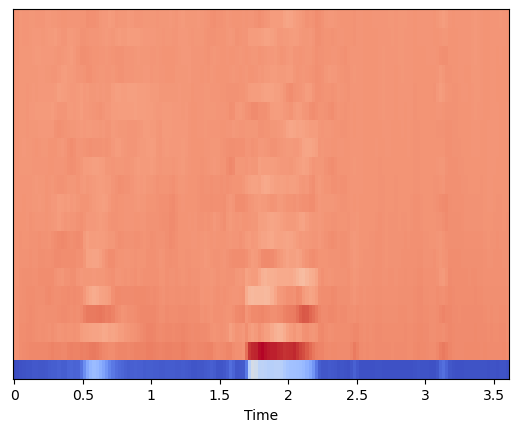

In [57]:
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape)

#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time');

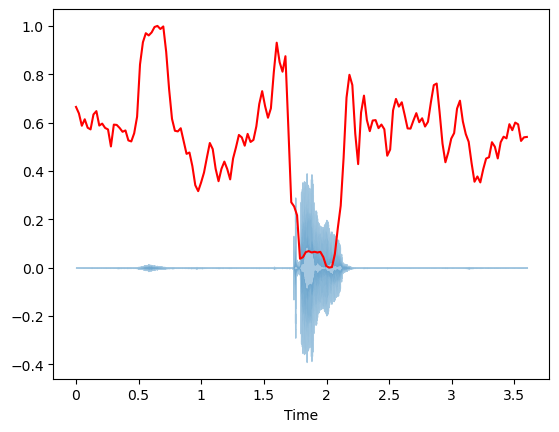

In [56]:
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
spectral_centroids.shape

# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r');

- We opted for spectrograms in our ASR system due to their superior time-frequency resolution, preservation of phase information, resilience to speech variations, ease of use, and customization capabilities. Spectrograms offer an intuitive visual representation and versatile applications in audio processing, rendering them a valuable choice for our ASR system.

## 7. MODELING
- Will use Convolutional Neural Network (CNN) which is a type of deep learning model designed for processing structured arrays of data such as images. It learns feature engineering by itself via filters (or kernel) optimization. CNNs are very good at picking up on patterns in the input image, such as lines, gradients, circles, or even eyes and faces. This property makes CNNs so powerful for computer vision.

In [58]:
# Loading data
ANNOTATIONS_FILE = "Data/Train2.csv"
AUDIO_DIR = "Data/Swahili_words"
SAMPLE_RATE = 16000
NUM_SAMPLES = int(SAMPLE_RATE*1.5)

# Training model
BATCH_SIZE = 128
EPOCHS = 12
LEARNING_RATE = 0.001
VAL_SPLIT = .2
SHUFFLE_DATASET = True
RANDOM_SEED = 2022

device = "cpu"

#### 7.1 Custom data loader for Training set
We defined out model functionon the Function.py file. Will call the function during modeling.

In [59]:
#Import our functions
from Functions import audio_transforms_spec

# defining which audio transformation function to be used
AUDIO_TRANSFORM = audio_transforms_spec

In [60]:
from Functions import SwahiliDataset

# Testing if the dataset class loads the data correctly
swahili_train = SwahiliDataset(ANNOTATIONS_FILE,
                            AUDIO_DIR,
                            AUDIO_TRANSFORM,
                            SAMPLE_RATE,
                            NUM_SAMPLES,
                            device)
print(f"There are {len(swahili_train)} samples in the dataset.")

There are 3376 samples in the dataset.


In [ ]:
#Defining our labels
labels = ['hapana', 'kumi', 'mbili', 'moja', 'nane', 'ndio', 'nne', 'saba', 'sita', 'tano', 'tatu', 'tisa']

###  7.2 AlexNet model
AlexNet is a convolutional neural network (CNN) architecture that consists of eight layers; the first five are convolutional layers, some of them followed by max-pooling layers, and the last three were fully connected layers. The network, except the last layer, is split into two copies, each run on one GPU.

In [ ]:
import torch.nn as nn
import torchvision.models as models

# Load the pre-trained AlexNet model
model_alexnet = models.alexnet(pretrained=True)

# Modify the first convolutional layer for a single input channel
model_alexnet.features[0] = nn.Conv2d(1, model_alexnet.features[0].out_channels,
                      kernel_size=model_alexnet.features[0].kernel_size[0],
                      stride=model_alexnet.features[0].stride[0],
                      padding=model_alexnet.features[0].padding[0])

# Replace the last fully connected layer for your specific number of output classes
num_ftrs = model_alexnet.classifier[6].in_features
model_alexnet.classifier[6] = nn.Linear(num_ftrs, 12) # 12 output classes for 12 words


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:00<00:00, 246MB/s]


In [ ]:
# AlexNet, pretrained
alexnet=model_alexnet.to(device)
summary(alexnet, (1, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]           7,808
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

In [ ]:
swahili_train = SwahiliDataset(ANNOTATIONS_FILE,
                               AUDIO_DIR,
                               AUDIO_TRANSFORM,
                               SAMPLE_RATE,
                               NUM_SAMPLES,
                               device)

train_dataloader, val_dataloader = create_data_loaders(swahili_train,
                                                       BATCH_SIZE,
                                                       VAL_SPLIT,
                                                       SHUFFLE_DATASET,
                                                       RANDOM_SEED)

# construct model and assign it to device
alexnet=model_alexnet.to(device)

# initialise loss funtion + optimiser
loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(alexnet.parameters(), lr=LEARNING_RATE)
scheduler = torch.optim.lr_scheduler.StepLR(optimiser, step_size=3, gamma=0.1, verbose=True)

# train model
train(alexnet, train_dataloader, val_dataloader, loss_fn, optimiser, scheduler, device, EPOCHS)

# save model
torch.save(alexnet.state_dict(), "alexnet_v2_spec.pth")
print("Trained model saved at alexnet_v2_spec.pth")

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 1
Adjusting learning rate of group 0 to 1.0000e-03.
training loss: 2.528510808944702, validation loss: 2.5754361152648926
---------------------------
Epoch 2
Adjusting learning rate of group 0 to 1.0000e-03.
training loss: 2.4936163425445557, validation loss: 2.4982080459594727
---------------------------
Epoch 3
Adjusting learning rate of group 0 to 1.0000e-04.
training loss: 2.4948856830596924, validation loss: 2.4929463863372803
---------------------------
Epoch 4
Adjusting learning rate of group 0 to 1.0000e-04.
training loss: 2.48541259765625, validation loss: 2.4923737049102783
---------------------------
Epoch 5
Adjusting learning rate of group 0 to 1.0000e-04.
training loss: 2.489980936050415, validation loss: 2.4841907024383545
---------------------------
Epoch 6
Adjusting learning rate of group 0 to 1.0000e-05.
training loss: 2.470390558242798, validation loss: 2.480534553527832
---------------------------
Epoch 7
Adjust

Training Loss: The training loss decreased over the epochs, indicating that the model was learning and converging. However, the validation loss seems to be consistently higher than the training loss, which could suggest that the model might be overfitting to the training data.

In [ ]:
alex_net = alexnet.to(device)
state_dict = torch.load("alexnet_v2_spec.pth")
alex_net.load_state_dict(state_dict)


# make predictions
TEST_ANNOTATIONS_FILE = "Data/Test2.csv"
# Load the test dataset

# Create a dataloader for the test dataset
test_dataloader = torch.utils.data.DataLoader(swahili_test, batch_size=BATCH_SIZE, shuffle=False)


swahili_test = SwahiliDataset_Testset(TEST_ANNOTATIONS_FILE,
                                      AUDIO_DIR,
                                      AUDIO_TRANSFORM,
                                      SAMPLE_RATE,
                                      NUM_SAMPLES,
                                      "cpu")

test_dataloader = create_test_data_loader(swahili_test)

predicted = predict_testset(alex_net, test_dataloader)
print(f"Predicted: {predicted}")

Predicted: tensor([[0.0857, 0.0826, 0.0809,  ..., 0.0798, 0.0829, 0.0880],
        [0.0857, 0.0826, 0.0809,  ..., 0.0798, 0.0829, 0.0880],
        [0.0857, 0.0826, 0.0809,  ..., 0.0798, 0.0829, 0.0880],
        ...,
        [0.0857, 0.0826, 0.0809,  ..., 0.0798, 0.0829, 0.0880],
        [0.0857, 0.0826, 0.0809,  ..., 0.0798, 0.0829, 0.0880],
        [0.0857, 0.0826, 0.0809,  ..., 0.0798, 0.0829, 0.0880]])


In [ ]:
predicted_labels = torch.argmax(predicted, dim=1).tolist()

In [ ]:
# Load the 'Test.csv' file
test_df = pd.read_csv(TEST_ANNOTATIONS_FILE)

# Add the 'predictions' column to the DataFrame
test_df['predictions'] = predicted_labels

# Assuming you have the labels list as mentioned above
test_df['predicted_words'] = [labels[p] for p in test_df['predictions']]


# Save the DataFrame back to the CSV file
test_df.to_csv(TEST_ANNOTATIONS_FILE, index=False)


test_df

Word_id Swahili_word English_translation  predictions  \
0    id_lpstklz51zpz.wav         nane               eight            4   
1    id_xdmrc926jjzo.wav       hapana                  no            4   
2    id_qoa7f8xeu9a6.wav        mbili                 two            4   
3    id_i4h4403hmxza.wav          nne                four            4   
4    id_9fwf3aocioyf.wav         sita                 six            4   
..                   ...          ...                 ...          ...   
819  id_a7dlo0ek2q8r.wav         moja                 one            4   
820  id_3he1kbmy8v2n.wav         ndio                 yes            4   
821  id_ho8aqa3s42zp.wav       hapana                  no            4   
822  id_3lhkgf9dqr4c.wav         kumi                 ten            4   
823  id_de7l1v9qibbc.wav         kumi                 ten            4   

    predicted_words  
0              nane  
1              nane  
2              nane  
3              nane  
4              nane  
..              ...  
819            nane  
820            nane  
821            nane  
822            nane  
823            nane  

[824 rows x 5 columns]

In [ ]:
# Import necessary libraries
from sklearn.metrics import accuracy_score

# Load your ASR model's predictions (replace this with your model's predictions)
# In this example, we assume you have a list of predicted transcriptions.
predicted_transcriptions = test_df['predicted_words']

# Load the true labels from the CSV file
true_labels = test_df['Swahili_word']

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_transcriptions)

print("Accuracy:", accuracy)

Accuracy: 0.0703883495145631


Accuracy: The accuracy for the AlexNet ASR model is very low, around 0.07. This suggests that the model is not performing well in terms of correctly transcribing audio recordings. There might be issues with the model architecture, data preprocessing, or training process.

### 7.3 ResNet-18 model
ResNet-18, a specific type of CNN, is an 18-layer deep network that uses the concept of “skip connections” or “shortcut connections” to allow the gradient to be directly backpropagated to earlier layers. This innovation helps in training very deep networks without the problem of vanishing gradients.

The architecture of ResNet-18 is a multi-layered feed-forward neural network, made by stacking many hidden layers on top of each other in sequence. It is this sequential design that allows ResNet-18 to learn hierarchical features. The hidden layers are typically convolutional layers followed by activation layers, some of them followed by pooling layers.

In [65]:
# Resnet, pretrained
model_resnet = resnet18(weights=ResNet18_Weights.DEFAULT)
model_resnet.conv1=nn.Conv2d(1, model_resnet.conv1.out_channels, 
                      kernel_size=model_resnet.conv1.kernel_size[0], 
                      stride=model_resnet.conv1.stride[0], 
                      padding=model_resnet.conv1.padding[0])
num_ftrs = model_resnet.fc.in_features
model_resnet.fc = nn.Linear(num_ftrs, 12) # 12 output classes for 12 words

In [66]:
resnet = model_resnet.to(device)
summary(resnet, (1, 200, 241)) 

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 100, 121]        3,200
├─BatchNorm2d: 1-2                       [-1, 64, 100, 121]        128
├─ReLU: 1-3                              [-1, 64, 100, 121]        --
├─MaxPool2d: 1-4                         [-1, 64, 50, 61]          --
├─Sequential: 1-5                        [-1, 64, 50, 61]          --
|    └─BasicBlock: 2-1                   [-1, 64, 50, 61]          --
|    |    └─Conv2d: 3-1                  [-1, 64, 50, 61]          36,864
|    |    └─BatchNorm2d: 3-2             [-1, 64, 50, 61]          128
|    |    └─ReLU: 3-3                    [-1, 64, 50, 61]          --
|    |    └─Conv2d: 3-4                  [-1, 64, 50, 61]          36,864
|    |    └─BatchNorm2d: 3-5             [-1, 64, 50, 61]          128
|    |    └─ReLU: 3-6                    [-1, 64, 50, 61]          --
|    └─BasicBlock: 2-2                   [-1, 64, 50, 61]          --
|

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 100, 121]        3,200
├─BatchNorm2d: 1-2                       [-1, 64, 100, 121]        128
├─ReLU: 1-3                              [-1, 64, 100, 121]        --
├─MaxPool2d: 1-4                         [-1, 64, 50, 61]          --
├─Sequential: 1-5                        [-1, 64, 50, 61]          --
|    └─BasicBlock: 2-1                   [-1, 64, 50, 61]          --
|    |    └─Conv2d: 3-1                  [-1, 64, 50, 61]          36,864
|    |    └─BatchNorm2d: 3-2             [-1, 64, 50, 61]          128
|    |    └─ReLU: 3-3                    [-1, 64, 50, 61]          --
|    |    └─Conv2d: 3-4                  [-1, 64, 50, 61]          36,864
|    |    └─BatchNorm2d: 3-5             [-1, 64, 50, 61]          128
|    |    └─ReLU: 3-6                    [-1, 64, 50, 61]          --
|    └─BasicBlock: 2-2                   [-1, 64, 50, 61]          --
|

#### 7.3.1 Training Resnet18 model

In [67]:
swahili_train = SwahiliDataset(ANNOTATIONS_FILE,
                               AUDIO_DIR,
                               AUDIO_TRANSFORM,
                               SAMPLE_RATE,
                               NUM_SAMPLES,
                               device)
    
train_dataloader, val_dataloader = create_data_loaders(swahili_train, 
                                                       BATCH_SIZE, 
                                                       VAL_SPLIT, 
                                                       SHUFFLE_DATASET, 
                                                       RANDOM_SEED)

# construct model and assign it to device
resnet = model_resnet.to(device)

# initialise loss funtion + optimiser
loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(resnet.parameters(), lr=LEARNING_RATE)
scheduler = torch.optim.lr_scheduler.StepLR(optimiser, step_size=3, gamma=0.1, verbose=True)

# train model
train(resnet, train_dataloader, val_dataloader, loss_fn, optimiser, scheduler, device, EPOCHS)

# save model
#torch.save(resnet.state_dict(), "resnet_v2_spec.pth")
#print("Trained model saved at resnet_v2_spec.pth")

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 1
Adjusting learning rate of group 0 to 1.0000e-03.
training loss: 0.4774620831012726, validation loss: 0.5723191499710083
---------------------------
Epoch 2
Adjusting learning rate of group 0 to 1.0000e-03.
training loss: 0.11846915632486343, validation loss: 0.24143831431865692
---------------------------
Epoch 3
Adjusting learning rate of group 0 to 1.0000e-04.
training loss: 0.05595243722200394, validation loss: 0.14507542550563812
---------------------------
Epoch 4
Adjusting learning rate of group 0 to 1.0000e-04.
training loss: 0.27942007780075073, validation loss: 0.4149646759033203
---------------------------
Epoch 5
Adjusting learning rate of group 0 to 1.0000e-04.
training loss: 0.044971756637096405, validation loss: 0.3195200264453888
---------------------------
Epoch 6
Adjusting learning rate of group 0 to 1.0000e-05.
training loss: 0.03983559086918831, validation loss: 0.31568068265914917
---------------------------

- Training Loss: The training loss for the ResNet18 ASR model decreased over the epochs, indicating that the model learned the data well. Like the AlexNet model, the validation loss is consistently higher, indicating a potential overfitting issue.

#### 7.3.2. Prediction on Test Set

In [75]:
#Load the saved pickle file
model_path = "model_CNN.pkl"
with open(model_path, 'rb') as model_file:
    model = pickle.load(model_file)

In [81]:
# Import the testing functions from Function.py
from Functions import create_test_data_loader,predict_testset,SwahiliDataset_Testset

In [ ]:
# load back the model
resnet = model_resnet.to(device)
state_dict = torch.load("resnet_v2_spec.pth")
resnet.load_state_dict(state_dict)

TEST_ANNOTATIONS_FILE = "Data/Test2.csv"

swahili_test = SwahiliDataset_Testset(TEST_ANNOTATIONS_FILE,
                                      AUDIO_DIR,
                                      AUDIO_TRANSFORM,
                                      SAMPLE_RATE,
                                      NUM_SAMPLES,
                                      "cpu")

test_dataloader = create_test_data_loader(swahili_test)

predicted = predict_testset(resnet, test_dataloader)
print(f"Predicted: {predicted}")

Predicted: tensor([[1.2396e-03, 3.3354e-03, 8.3870e-03,  ..., 2.4872e-04, 1.9085e-04,
         4.4377e-04],
        [9.9982e-01, 5.5680e-06, 3.0518e-07,  ..., 1.3890e-05, 8.9095e-06,
         6.6388e-06],
        [7.5857e-04, 1.6397e-03, 9.8294e-01,  ..., 3.2661e-04, 3.6007e-04,
         6.3373e-05],
        ...,
        [9.9484e-01, 1.7022e-04, 1.7020e-04,  ..., 1.0620e-04, 6.1710e-04,
         1.6502e-04],
        [5.8389e-03, 7.3513e-01, 6.7266e-03,  ..., 7.1528e-03, 9.6241e-03,
         2.0807e-03],
        [8.7776e-04, 9.9227e-01, 1.3087e-04,  ..., 2.8792e-03, 1.5223e-03,
         9.3368e-04]])


In [ ]:
# Predict with torch
predicted_labels = torch.argmax(predicted, dim=1).tolist()

In [ ]:
# Load the 'Test.csv' file
test_df = pd.read_csv(TEST_ANNOTATIONS_FILE)

# Add the 'predictions' column to the DataFrame
test_df['predictions'] = predicted_labels

# Call the labels list as mentioned above
test_df['predicted_words'] = [labels[p] for p in test_df['predictions']]


# Save the DataFrame back to the CSV file
test_df.to_csv(TEST_ANNOTATIONS_FILE, index=False)


In [ ]:
test_df

Word_id Swahili_word English_translation  predictions  \
0    id_lpstklz51zpz.wav         nane               eight            6   
1    id_xdmrc926jjzo.wav       hapana                  no            0   
2    id_qoa7f8xeu9a6.wav        mbili                 two            2   
3    id_i4h4403hmxza.wav          nne                four            6   
4    id_9fwf3aocioyf.wav         sita                 six            8   
..                   ...          ...                 ...          ...   
819  id_a7dlo0ek2q8r.wav         moja                 one            3   
820  id_3he1kbmy8v2n.wav         ndio                 yes            5   
821  id_ho8aqa3s42zp.wav       hapana                  no            0   
822  id_3lhkgf9dqr4c.wav         kumi                 ten            1   
823  id_de7l1v9qibbc.wav         kumi                 ten            1   

    predicted_words  
0               nne  
1            hapana  
2             mbili  
3               nne  
4              sita  
..              ...  
819            moja  
820            ndio  
821          hapana  
822            kumi  
823            kumi  

[824 rows x 5 columns]

In [ ]:
#Define the predicted transcription
predicted_transcriptions = test_df['predicted_words']

# Load the true labels
true_labels = test_df['Swahili_word']

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_transcriptions)

print("Accuracy:", accuracy)

Accuracy: 0.9368932038834952


**Accuracy:** The accuracy for the ResNet18 ASR model is much higher, around **0.937**, which is a significant improvement compared to the AlexNet model. This suggests that the ResNet18 architecture is suitable for the ASR task.

In [ ]:
from jiwer import wer

predicted_transcriptions = test_df['predicted_words'].tolist()
true_labels = test_df['Swahili_word'].tolist()

# Calculate WER
wer_score = wer(true_labels, predicted_transcriptions)

print("Word Error Rate (WER):", wer_score)

Word Error Rate (WER): 0.06310679611650485


Word Error Rate (WER): A WER of **0.063** indicates that the ResNet18 model is making relatively few errors in transcribing the audio recordings. This is a positive sign of its performance.

## 8. Conclusions
**AlexNet ASR Model**

Training Loss: The training loss decreased over the epochs, indicating that the model was learning and converging. However, the validation loss seems to be consistently higher than the training loss, which could suggest that the model might be overfitting to the training data.

Accuracy: The accuracy for the AlexNet ASR model is very low, around 0.07. This suggests that the model is not performing well in terms of correctly transcribing audio recordings. There might be issues with the model architecture, data preprocessing, or training process.

Learning Rate Scheduling: The learning rate was adjusted during model training. It helps the model converge efficiently.

**ResNet18 ASR Model**

Training Loss: The training loss for the ResNet18 ASR model decreased over the epochs, indicating that the model learned the data well. Like the AlexNet model, the validation loss is consistently higher, indicating a potential overfitting issue.

Accuracy: The accuracy for the ResNet18 ASR model is much higher, around 0.937, which is a significant improvement compared to the AlexNet model. This suggests that the ResNet18 architecture might be better suited for the ASR task.

Word Error Rate (WER): A WER of 0.063 indicates that the ResNet18 model is making relatively few errors in transcribing the audio recordings. This is a positive sign of its performance.


## 9. Recommendations
1. Further Model Evaluation: While ResNet18 shows promising results, it's essential to perform more rigorous evaluation, including testing on a larger and diverse dataset. This can help assess the model's generalization ability.

2. Incorporate a broader range of Swahili audio recordings, including longer sentences and passages to expand the scope of this project.

3. Language Model Integration: To enhance transcription accuracy, consider incorporating language models to improve the fluency and coherence of the transcribed text.

4. Data Quality and Preprocessing: Ensure that the data used for training and validation is of high quality and that proper preprocessing techniques are applied. Data augmentation methods can also be employed to enhance the model's ability to handle various audio conditions and audio formarts.

5. Use a powerful GPU device to train the model on big audio files and improve the models performance.

6. Hyperparameter Tuning: Experiment with different hyperparameters like batch size, learning rates, and the number of layers or filters in the models. Hyperparameter tuning can significantly impact model performance.

7. Regularization Techniques: Given that overfitting might be an issue, consider adding regularization techniques such as dropout, weight decay, or early stopping to prevent the models from overfitting the training data.
